In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from itertools import combinations

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_formats = ['svg']

In [2]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100], dtype=np.float64)
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165])

__x1__ - площади квартир (м$^2$)
__x2__ - цена (тыс. $)

In [3]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b0 = y1.mean() - b1 * x1.mean()

b0, b1

(77.8996282527881, 0.8717472118959109)

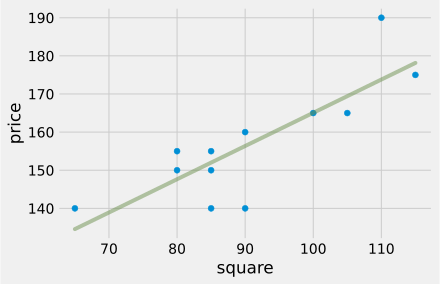

In [4]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='C3', alpha=0.5)

plt.xlabel('square')
plt.ylabel('price')

plt.show()

In [5]:
e1 = y1 - (b0 + b1 * x1)
e1

array([  2.3605948 ,   3.64312268,   3.00185874,  -3.15055762,
       -11.99814126,  -1.99814126, -16.35687732,   7.3605948 ,
        -4.4330855 ,  16.20817844,   5.43680297,  -0.07434944])

Метод наименьших квадратов

In [6]:
df = pd.read_csv('data/car_ad.csv', encoding="ISO-8859-1")
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [7]:
x = df[['year', 'mileage']].values
y = df['price'].values

x.shape

(9576, 2)

In [8]:
ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))
x.shape

(9576, 3)

In [9]:
XTX = x.T.dot(x)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x.T).dot(y)

b

array([-1.93405588e+06,  9.74524380e+02, -4.17482598e+01])

In [10]:
e = y - x.dot(b)
e.mean()

7.687354967645435e-08

In [11]:
lr = LinearRegression(fit_intercept=False).fit(x, y)

b, lr.coef_

(array([-1.93405588e+06,  9.74524380e+02, -4.17482598e+01]),
 array([-1.93405588e+06,  9.74524380e+02, -4.17482598e+01]))

Коеффициент детерминации

In [12]:
def sum_of_squares(samples):
    return ((samples - samples.mean())**2).sum()

In [13]:
R1 = 1 - sum_of_squares(e1) / sum_of_squares(y1)
R2 = 1 - sum_of_squares(e) / sum_of_squares(y)

R1, R2

(0.6752261641274685, 0.15919044134243387)

F-тест

In [14]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 10)

In [15]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.9646027437307145

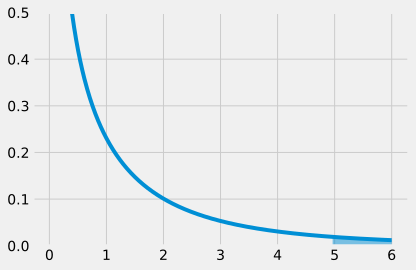

In [16]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.ylim(0, 0.5)
plt.show()

In [17]:
F = (R1 / k1) / ((1 - R1) / k2)
F

20.79065766838693

In [18]:
n = x.shape[0]
m = x.shape[1] - 1

k1 = m
k2 = n - m - 1

k1, k2

(2, 9573)

In [19]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.996669940377957

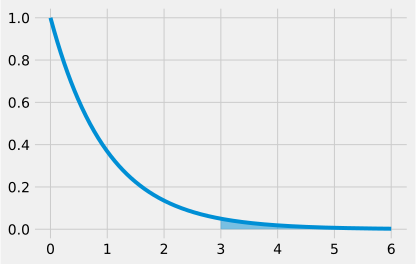

In [20]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

plt.show()

In [21]:
F = (R2 / k1) / ((1 - R2) / k2)
F

906.2278605658464

Доверительный интервал для парной регрессии

In [22]:
b0, b1

(77.8996282527881, 0.8717472118959109)

In [23]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [24]:
s_slope = standard_error_slope(x1, y1, x1 * b1 - b0)
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.2281388519649385, 2.2281388519649385)

In [25]:
b1_lower, b1_upper = (b1 + t1 * s_slope, b1 + t2 * s_slope)

b1_lower, b1_upper

(-7.171338912446319, 8.914833336238141)

Двухвыборочный t-тест

Росты людей

In [26]:
x1 = np.array([169.6, 178.6, 175.3, 171.8, 169.8, 164.1, 179. , 162.9, 179.5,
               169.1, 173.7, 168.7, 182.9, 176.3, 156.9, 174.2, 187.2, 178.5])

x2 = np.array([180.3, 179.4, 178.3, 168.8, 151.4, 168.1, 169.1, 150. , 156.3,
               176.3, 163.5, 169.8, 177.5, 168. , 162.4, 167.3, 176.4, 166.1,
               164.9, 163.4, 163.2, 169.6, 160.9, 170.8])

n1 = x1.shape[0]
n2 = x2.shape[0]
d1 = x1.var(ddof=1)
d2 = x2.var(ddof=1)
n1, n2

(18, 24)

In [27]:
std_delta = np.sqrt((d1 / n1) + (d2 / n2))
std_delta

2.4248215967971274

In [28]:
t = (x1.mean() - x2.mean()) / std_delta
t

2.331213886103755

In [29]:
df = std_delta**4 / (((d1 / n1)**2 / (n1 - 1)) + ((d2 / n2)**2 / (n2 - 1)))
df

38.26495067241465

In [30]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-2.0239339487009755, 2.023933948700975)

In [31]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=2.331213886103755, pvalue=0.025107534360731)

#### __Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.

In [32]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
              [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
              [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
              [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
              [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
              [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
              [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
              [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
              [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
              [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
               7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [33]:
pairs = np.array(list(combinations([0, 1, 2, 3], r=2)))


for f1, f2 in pairs:
    x = X[:, [f1, f2]]
    lr = LinearRegression().fit(x, y)
    print("[{}] and [{}] gives {}".format(f1, f2, round(lr.score(x, y), 8)))

[0] and [1] gives 0.18113595
[0] and [2] gives 0.76342462
[0] and [3] gives 0.45329668
[1] and [2] gives 0.54794827
[1] and [3] gives 0.60620558
[2] and [3] gives 0.62244199


Признаки под индексами 0 и 2 дают наибольшее значение линейной зависимости, следовательно ответ: __0.76342462__

#### __Задача 2__

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

In [34]:
d = 0.76342462
X = np.vstack((X[0:, 0], X[0:, 2])).T

n = X.shape[0]
m = X.shape[1]

k1 = m
k2 = n - m - 1

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)

F = (d / k1) / ((1 - d) / (k2))
t, F

(4.73741412777588, 11.29443888032643)

Статистика входит в критическую область, следоваетльно R$^2 \neq$ 0. Ответ: __1__

#### __Задача 3__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

In [35]:
A = np.append(np.zeros((2509 - 77)), np.ones((77)))
B = np.append(np.zeros((1465 - 60)), np.ones((60)))

stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

F < P-value, значит нельзя утверждать, что H$_0$ - ошибочна. Ответ: __0__